In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import vitaldb

# Set Up Local Data

In [20]:
# Todo, download cache local csv of frequently used

# Cases

In [8]:
cases = pd.read_csv('vitaldb/cases.csv')
cases = cases.set_index('caseid')
cases.shape

(6388, 73)

In [9]:
cases.index.nunique()

6388

In [6]:
cases.head()

,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
caseid,,,,,,,,,,,,,,,,,,,,,
1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,0,...,0,120,0.0,100,70,0,10,0,0,0
2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,0,...,0,150,0.0,0,100,0,20,0,0,0
3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,0,...,0,0,0.0,0,50,0,0,0,0,0
4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,1,...,0,80,0.0,100,100,0,50,0,0,0
5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,13,...,0,0,0.0,0,160,0,10,900,0,2100


In [7]:
cases['sex'].value_counts()

sex
M    3243
F    3145
Name: count, dtype: int64

# Tracks

In [11]:
trks = pd.read_csv('vitaldb/trks.csv')
trks = trks.set_index('caseid')
trks.shape

(486449, 2)

In [12]:
trks.index.nunique()

6388

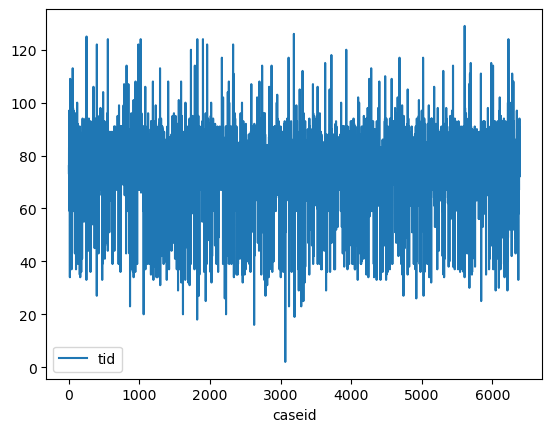

In [15]:
trks.groupby('caseid')[['tid']].count().plot();

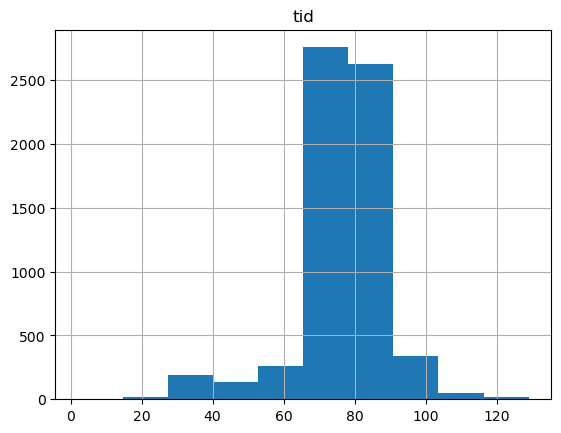

In [16]:
trks.groupby('caseid')[['tid']].count().hist();

In [24]:
trks.groupby('tname').count().sort_values(by='tid', ascending=False)

,tid
tname,
Solar8000/HR,6387
Solar8000/PLETH_SPO2,6386
Solar8000/PLETH_HR,6386
Primus/CO2,6362
Primus/PAMB_MBAR,6361
...,...
Orchestra/AMD_VOL,1
Solar8000/ST_V5,1
Orchestra/NPS_VOL,1


## Cases of Interest

### Hemodynamic Parameters
https://vitaldb.net/dataset/?query=overview#h.f7d712ycdpk2

**Solar8000/ART_MBP**

mean blood pressure

Parameter, Description, Type/Hz, Unit

Solar8000/ART_MBP, Mean arterial pressure, N, mmHg

In [19]:
trks[trks['tname'].str.contains('Solar8000/ART_MBP')].shape

(3724, 2)

**SNUADC/ART**

arterial blood pressure waveform

Parameter, Description, Type/Hz, Unit

SNUADC/ART, Arterial pressure wave, W/500, mmHg

In [18]:
trks[trks['tname'].str.contains('SNUADC/ART')].shape

(3645, 2)

**SNUADC/ECG_II**

electrocardiogram waveform

Parameter, Description, Type/Hz, Unit

SNUADC/ECG_II, ECG lead II wave, W/500, mV

In [25]:
trks[trks['tname'].str.contains('SNUADC/ECG_II')].shape

(6355, 2)

**BIS/EEG1_WAV**

electroencephalogram waveform

Parameter, Description, Type/Hz, Unit

BIS/EEG1_WAV, EEG wave from channel 1, W/128, uV

In [26]:
trks[trks['tname'].str.contains('BIS/EEG1_WAV')].shape

(5871, 2)

## Cases of Interest

In [30]:
t = trks.reset_index()
c = cases.reset_index()

coi = list(
    set(t.loc[t['tname'] == 'SNUADC/ART', 'caseid']) & 
    set(t.loc[t['tname'] == 'SNUADC/ECG_II', 'caseid']) & 
    set(t.loc[t['tname'] == 'BIS/EEG1_WAV', 'caseid']) & 
    set(c.loc[c['age'] > 18, 'caseid']) & 
    set(c.loc[c['ane_type'] == 'General', 'caseid'])
)

len(coi)

3295

In [ ]:
!ls -l

In [ ]:
!ls -l ./tracks

In [ ]:
cases.loc[42]

In [ ]:
t1 = vitaldb.vital_trks(42)

In [ ]:
v = vitaldb.VitalFile(42)

In [ ]:
trks.loc[42]

In [ ]:
vv = vitaldb.read_csv('./tracks/ad13b2c39b19193c8ae4a2de4f8315f18d61a57e.csv')
vv

In [ ]:
track_names = ['BIS/BIS']
#vv = vitaldb.VitalFile(1, track_names)
#samples = vf.to_numpy(track_names, 1/100)
samples = vv.to_numpy(track_names, interval=1/100)

plt.figure(figsize=(20, 5))
plt.plot(samples[:, 0])
plt.show()

In [ ]:
samples[:10]

In [ ]:
!ls -l

In [ ]:
tpp = pd.read_csv('./teams_per_paper.csv')
tpp.info()

In [ ]:
tpp.hist()

In [ ]:
tpp.groupby('count').size()